
<h1 align=center><font size = 5> <center>文本分析与挖掘</center> </font></h1> 

<h2 align=center><font size = 4><center>实验三、新闻数据分类-Part 3</center></font></h2>
<h2 align=center><font size = 2><center>浙江工业大学计算机科学与技术学院</center></font></h2>

## 实验内容
<div class="alert alert-block alert-info" style="margin-top: 20px">
<li>新闻数据预处理和词袋表示</li>
<li>降维和可视化</li>
<li>用朴素贝叶斯算法对新闻数据进行分类</li>
<li>不同算法有效性和时间的对比</li>

<b> 1.新闻数据预处理和词袋表示</b>

<b>a.加载 20newsgroups 数据集，并打印查看其中一个文档（如果太长可以打印部分）。</b>

In [36]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

# 获取"20 Newsgroups"数据集
data = fetch_20newsgroups(subset='all', shuffle=True, remove=('headers', 'footers', 'quotes'))

# 构建数据集DataFrame
corpus = data.data
target_labels = data.target
target_names = [data.target_names[label] for label in target_labels]

data_df = pd.DataFrame({'Article': corpus, 'Target Label': target_labels, 'Target Name': target_names})
data_df_org = data_df

# 打印其中一个文档
article = data_df.loc[0, 'Article']
print(article)



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




<b>b.针对以上数据集特点，适当调整和完善 预处理函数EngPreprocess(),对 20newsgroups
原始数据进行恰当的预处理，并将预处理后的文档保存到文件；请对每个预处理步骤进行具体描述。<b>

In [37]:
import nltk
import spacy
from nltk.tokenize.toktok import ToktokTokenizer

# 下载nltk停用词
nltk.download('stopwords')

# 加载英语预训练模型
nlp = spacy.load('en_core_web_sm')

# 初始化tokenizer和停用词列表
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')

# 定义词干提取函数
def stem_text(text):
    # 初始化Porter词干提取器
    ps = nltk.porter.PorterStemmer()
    # 使用tokenizer对文本进行分词
    tokens = tokenizer.tokenize(text)
    # 对每个单词进行词干提取并保存到列表中
    stem_token = [ps.stem(token.strip()) for token in tokens]
    # 将列表中的单词拼接成新的文本并返回
    text = ' '.join(stem_token)
    return text

# 定义词性还原函数
def lemmatize_text(text):
    # 使用spacy对文本进行处理
    doc = nlp(text)
    # 对每个单词进行词性还原，并将结果保存到列表中
    lemma_word = [word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in doc]
    # 将列表中的单词拼接成新的文本并返回
    text = ' '.join(lemma_word)
    return text

# 定义去停用词函数
def remove_stopwords(text, is_lower_case=False):
    # 使用tokenizer对文本进行分词
    tokens = tokenizer.tokenize(text)
    # 去除单词中的多余空格并保存到列表中
    tokens = [token.strip() for token in tokens]
    # 根据is_lower_case参数选择是否忽略大小写
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    # 将过滤后的单词拼接成新的文本并返回
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

# 定义英语预处理函数
def EngPreprocess(corpus, text_stemming=True, text_lemmatization=False, stopword_removal=True, text_lower_case=False):
    # 初始化规范化文本列表
    normalized_corpus = []
    # 对每个文档进行预处理
    for doc in corpus:
        # 如果text_stemming为True，则进行词干提取
        if text_stemming:
            doc = stem_text(doc)
        # 如果text_lemmatization为True，则进行词性还原
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # 如果stopword_removal为True，则进行去停用词
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
        # 将处理后的文档添加到规范化文本列表中
        normalized_corpus.append(doc)
    # 返回规范化文本列表
    return normalized_corpus

article_list = data_df['Article'].tolist()
article_list = article_list[:1000]

# 将预处理后的文档逐行写入到文件中
with open('preprocessed_documents.txt', 'w', encoding='utf-8') as file:
    for doc in article_list:
        file.write(doc + '\n')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\20848\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<b>c.给出预处理之后的数据统计信息，包括文档数目、词的数目、文档的平均长度等。</b>

In [38]:
# 导入所需的库
import spacy

# 加载spaCy的英文模型
nlp = spacy.load('en_core_web_sm')

num_documents = 0  # 文档数目
total_words = 0  # 所有文档中词的总数
for doc in article_list:
    processed_doc = nlp(doc)
    total_words += len(processed_doc)
    num_documents += 1

average_length = total_words / num_documents  # 文档的平均长度

# 打印统计信息
print("文档数目:", num_documents)
print("词的数目:", total_words)
print("文档的平均长度:", average_length)

文档数目: 1000
词的数目: 223742
文档的平均长度: 223.742


<b>d.读入预处理完的文档数据，进行词袋表示，得到基于词频的和TF-IDF 的两种数据矩阵。</b>

In [39]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

documents = article_list

# 基于词频的词袋表示
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(documents)

# 基于TF-IDF的表示
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# 打印词袋表示和TF-IDF表示的矩阵形状
print("基于词频的词袋表示矩阵形状:", count_matrix.shape)
print(count_matrix)
print("基于TF-IDF的表示矩阵形状:", tfidf_matrix.shape)
print(tfidf_matrix)

基于词频的词袋表示矩阵形状: (1000, 18367)
  (0, 1887)	3
  (0, 15973)	1
  (0, 15314)	1
  (0, 2700)	1
  (0, 11793)	8
  (0, 12405)	5
  (0, 6864)	1
  (0, 2205)	3
  (0, 12989)	1
  (0, 4427)	1
  (0, 1421)	2
  (0, 16352)	10
  (0, 9811)	1
  (0, 2066)	1
  (0, 9671)	1
  (0, 12824)	1
  (0, 13652)	1
  (0, 10586)	1
  (0, 5475)	2
  (0, 1549)	1
  (0, 2965)	3
  (0, 13345)	1
  (0, 16587)	1
  (0, 1976)	1
  (0, 13854)	1
  :	:
  (999, 1886)	2
  (999, 8463)	2
  (999, 17717)	3
  (999, 6175)	1
  (999, 4050)	1
  (999, 4947)	1
  (999, 15099)	1
  (999, 17829)	1
  (999, 7283)	3
  (999, 12658)	5
  (999, 11688)	3
  (999, 3611)	1
  (999, 4992)	1
  (999, 7389)	3
  (999, 5981)	1
  (999, 6595)	1
  (999, 12784)	1
  (999, 11475)	1
  (999, 13457)	1
  (999, 6694)	1
  (999, 12917)	1
  (999, 16393)	1
  (999, 5044)	1
  (999, 13481)	1
  (999, 4549)	1
基于TF-IDF的表示矩阵形状: (1000, 18367)
  (0, 14359)	0.08541356706305611
  (0, 7467)	0.07151789638446594
  (0, 7051)	0.07902839174544544
  (0, 10248)	0.08298603607125657
  (0, 9269)	0.0939015653739706

<b> 2.降维和可视化</b>

<b>a.对基于 TF-IDF 的数据矩阵进行 PCA 降维，得到二维表示。

In [40]:
from sklearn.decomposition import PCA

# 初始化PCA模型，设置目标维度为2
pca = PCA(n_components=2)

# 对TF-IDF矩阵进行降维
tv_pca = pca.fit_transform(tfidf_matrix[:1000][:1000].toarray())

<b>b. 打印二维表示散点图（用不同颜色代表真实类别标签），观察并
讨论该新闻数据的分布情况。

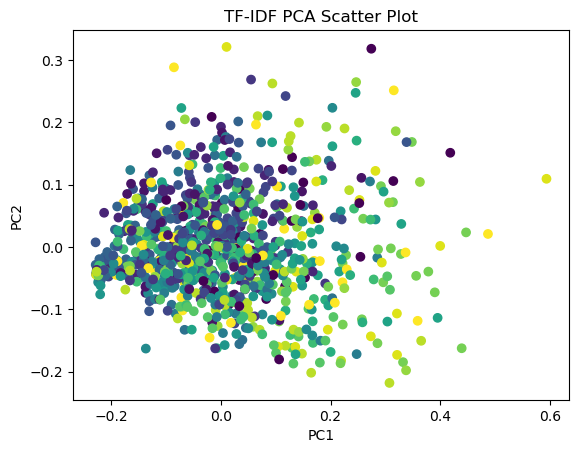

In [41]:
import matplotlib.pyplot as plt

# 创建散点图
plt.scatter(tv_pca[:, 0], tv_pca[:, 1], c = data_df['Target Label'][:1000], cmap='viridis')
# 添加标题和轴标签
plt.title('TF-IDF PCA Scatter Plot')
plt.xlabel('PC1')
plt.ylabel('PC2')

# 显示图形
plt.show()

<b>3.用朴素贝叶斯算法对新闻数据进行分类

<b>a.用朴素贝叶斯算法对基于 Part1 中得到的词频表示的新闻数据进行分类，得到 5 折交叉验证的准确率（Accuracy）。

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# 划分训练集和测试集
train_corpus, test_corpus, train_label_nums, test_label_nums, train_label_names, test_label_names = train_test_split(
    np.array(data_df['Article']),
    data_df['Target Label'],
    data_df['Target Name'],
    test_size=0.33,
    random_state=42
)

# 基于词频的词袋表示
cv = CountVectorizer(min_df=0.0, max_df=1.0)
cv_train_features = cv.fit_transform(train_corpus)
cv_test_features = cv.transform(test_corpus)

In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

# 创建多项式朴素贝叶斯分类器
mnb = MultinomialNB(alpha=1)

# 使用训练集特征和标签进行模型训练
mnb.fit(cv_train_features, train_label_names)

# 使用交叉验证计算模型精度
mnb_bow_cv_scores = cross_val_score(mnb, cv_train_features, train_label_names, cv=5)
mnb_bow_cv_mean_score = np.mean(mnb_bow_cv_scores)

# 输出交叉验证精度
print('交叉验证精度 (5折):', mnb_bow_cv_scores)
print('平均交叉验证精度:', mnb_bow_cv_mean_score)

# 计算并输出测试集精度
mnb_bow_test_score = mnb.score(cv_test_features, test_label_names)
print('测试集精度:', mnb_bow_test_score)

交叉验证精度 (5折): [0.55146477 0.55643564 0.55762376 0.58059406 0.54415842]
平均交叉验证精度: 0.5580553295234512
测试集精度: 0.5930868167202572


<b>b.改用基于 TF-IDF 表示的新闻数据，重复 a 中实验，对比准确率

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
import numpy as np

# 初始化TF-IDF向量化器
tv = TfidfVectorizer(min_df=0.0, max_df=1.0)

# 将训练集和测试集文本数据转换为TF-IDF特征表示
tv_train_features = tv.fit_transform(train_corpus)
tv_test_features = tv.transform(test_corpus)

# 初始化多项式朴素贝叶斯分类器
mnb = MultinomialNB(alpha=1)

# 在训练集上训练分类器
mnb.fit(tv_train_features, train_label_names)

# 使用5折交叉验证计算准确率
mnb_bow_tv_scores = cross_val_score(mnb, tv_train_features, train_label_names, cv=5)
mnb_bow_tv_mean_score = np.mean(mnb_bow_tv_scores)

# 输出交叉验证准确率和平均准确率
print('交叉验证准确率 (5折):', mnb_bow_tv_scores)
print('平均交叉验证准确率:', mnb_bow_tv_mean_score)

# 在测试集上计算准确率并输出
mnb_bow_test_score = mnb.score(tv_test_features, test_label_names)
print('测试集准确率:', mnb_bow_test_score)


交叉验证准确率 (5折): [0.63182898 0.63366337 0.64039604 0.64712871 0.64118812]
平均交叉验证准确率: 0.6388410432492181
测试集准确率: 0.65


TF-IDF的5折交叉验证的准确率比词频的低。

<b>c.对原始数据（不进行预处理）进行 TF-IDF 表示，重复 a 中实验，对比步骤 b 的准确率，讨论预处理的作用。

In [45]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# 提取目标标签在 8 到 13 之间的数据，并选择相关列
data_df_org2 = data_df_org[(data_df_org['Target Label'] >= 8) & (data_df_org['Target Label'] <= 13)][['Article', 'Target Label', 'Target Name']]
data_df_org2 = data_df_org2.sample(frac=0.3, random_state=42)  # 只提取百分之30的数据

# 划分训练集和测试集
train_corpus, test_corpus, train_label_nums, test_label_nums, train_label_names, test_label_names = train_test_split(
    np.array(data_df['Article']), data_df['Target Label'], data_df['Target Name'], test_size=0.33, random_state=42)

# 基于词频的词袋表示
cv = CountVectorizer(min_df=0.0, max_df=1.0)
cv_train_features = cv.fit_transform(train_corpus)
cv_test_features = cv.transform(test_corpus)

# 输出相关信息
print('训练集特征形状:', cv_train_features.shape)
print('测试集特征形状:', cv_test_features.shape)


训练集特征形状: (12626, 100336)
测试集特征形状: (6220, 100336)


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

# 初始化TF-IDF向量化器
tv = TfidfVectorizer(min_df=0.0, max_df=1.0)

# 将训练集和测试集文本数据转换为TF-IDF特征表示
tv_train_features = tv.fit_transform(train_corpus)
tv_test_features = tv.transform(test_corpus)

# 初始化多项式朴素贝叶斯分类器
mnb = MultinomialNB(alpha=1)

# 在训练集上训练分类器
mnb.fit(tv_train_features, train_label_names)

# 使用5折交叉验证计算准确率
mnb_bow_tv_scores = cross_val_score(mnb, tv_train_features, train_label_names, cv=5)
mnb_bow_tv_mean_score = mnb_bow_tv_scores.mean()

# 输出交叉验证准确率和平均准确率
print('交叉验证准确率 (5-fold):', mnb_bow_tv_scores)
print('平均交叉验证准确率:', mnb_bow_tv_mean_score)

# 在测试集上计算准确率并输出
mnb_bow_test_score = mnb.score(tv_test_features, test_label_names)
print('测试集准确率:', mnb_bow_test_score)


交叉验证准确率 (5-fold): [0.63182898 0.63366337 0.64039604 0.64712871 0.64118812]
平均交叉验证准确率: 0.6388410432492181
测试集准确率: 0.65


预处理可以增加准确率。

<b>d.改变 min_df 和 max_df 这两个参数（具体含义）的值得到 TF-IDF 表示，重复 a 中实验，对比步骤 b 的准确率并讨论。

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
import numpy as np

# 初始化TF-IDF向量化器
tv = TfidfVectorizer(min_df=0.2, max_df=0.9)

# 将训练集和测试集文本数据转换为TF-IDF特征表示
tv_train_features = tv.fit_transform(train_corpus)
tv_test_features = tv.transform(test_corpus)

# 初始化多项式朴素贝叶斯分类器
mnb = MultinomialNB(alpha=1)

# 在训练集上训练分类器
mnb.fit(tv_train_features, train_label_names)

# 使用5折交叉验证计算准确率
mnb_bow_tv_scores = cross_val_score(mnb, tv_train_features, train_label_names, cv=5)
mnb_bow_tv_mean_score = np.mean(mnb_bow_tv_scores)

# 输出交叉验证准确率和平均准确率
print('交叉验证准确率 (5折):', mnb_bow_tv_scores)
print('平均交叉验证准确率:', mnb_bow_tv_mean_score)

# 在测试集上计算准确率并输出
mnb_bow_test_score = mnb.score(tv_test_features, test_label_names)
print('测试集准确率:', mnb_bow_test_score)


交叉验证准确率 (5折): [0.16904196 0.17346535 0.16712871 0.17227723 0.1750495 ]
平均交叉验证准确率: 0.17139255113159774
测试集准确率: 0.1667202572347267


发现准确率大大下降，可能因为样本减少了。

<b>4.不同算法有效性和时间的对比

<b>a.基于预处理后的 TF-IDF 表示，用支持向量机对其进行分类，给出 5 折交叉验证的准确率。。

In [48]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

# 初始化TF-IDF向量化器
tfidf_vectorizer = TfidfVectorizer()

# 将文本数据转换为TF-IDF特征表示
tfidf_matrix = tfidf_vectorizer.fit_transform(data_df['Article'])

# 初始化支持向量机分类器
svm_classifier = SVC()

# 使用5折交叉验证计算准确率
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = cross_val_score(svm_classifier, tfidf_matrix, data_df['Target Label'], cv=cv)

# 打印准确率
print("5折交叉验证准确率:", accuracies)
print("平均准确率:", accuracies.mean())

5折交叉验证准确率: [0.74111406 0.72141151 0.73680021 0.71955426 0.70947201]
平均准确率: 0.7256704105036691


SVM可以能够处理非线性问题，且泛化性好。

<b>b.对比朴素贝叶斯和支持向量机的训练和测试时间。综合准确率和两个时间讨论：实际应用中如何对算法进行选择。

训练时间：朴素贝叶斯通常具有较短的训练时间，因为它假设特征之间相互独立，从而减少了参数估计的复杂度。相比之下，支持向量机在处理大型数据集时可能需要更长的训练时间，特别是在使用复杂核函数时。

测试时间：在预测新样本时，朴素贝叶斯通常具有较短的测试时间，因为它只需进行简单的概率计算。而支持向量机在预测时可能需要更长的时间，特别是在高维空间中或者使用复杂核函数时。

综合准确率：在选择算法时，除了训练和测试时间外，还需要考虑模型的综合准确率。朴素贝叶斯通常在处理文本分类等问题时表现良好，而支持向量机在复杂的非线性分类问题上可能表现更好。


如果数据集较大，且对训练和预测时间有较高要求，可以倾向选择朴素贝叶斯。
如果对模型的预测准确率有较高要求，且数据集的特征较复杂，可以倾向选择支持向量机。